#### Set Up

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

from datasets import load_dataset

ds = load_dataset("potsawee/wiki_bio_gpt3_hallucination")

c:\Users\ADMIN\.conda\envs\bachelor-thesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Dataset Analysis

In [2]:
keys = ds['evaluation'][0].keys()
print(f"Length of dataset {len(ds['evaluation'])}")
print(f"List of keys: {keys}")

Length of dataset 238
List of keys: dict_keys(['gpt3_text', 'wiki_bio_text', 'gpt3_sentences', 'annotation', 'wiki_bio_test_idx', 'gpt3_text_samples'])


In [3]:
ds['evaluation'][0]

{'gpt3_text': "John Russell Reynolds (1820–1876) was an English lawyer, judge, and author. He was born in London, the son of a barrister, and was educated at Eton College and Trinity College, Cambridge. He was called to the bar in 1845, and became a Queen's Counsel in 1859. He was appointed a judge of the Court of Common Pleas in 1867, and was knighted in 1871.\n\nReynolds was a prolific author, writing on a wide range of topics. He wrote several books on legal topics, including The Law of Libel and Slander (1863), The Law of Copyright (1865), and The Law of Patents for Inventions (1868). He also wrote on a variety of other topics, including history, biography, and literature. He was a frequent contributor to the Saturday Review, and wrote several books on Shakespeare, including The Mystery of William Shakespeare (1848) and The Authorship of Shakespeare (1875). He also wrote a biography of the poet John Keats (1848).",
 'wiki_bio_text': 'Sir John Russell Reynolds, 1st Baronet (22 May 1

In [4]:
context_lengths = [len(sample['wiki_bio_text']) for sample in ds['evaluation']]
print(f"Average length of wiki_bio_text in evaluation split: {round(sum(context_lengths) / len(context_lengths), 2)}")

Average length of wiki_bio_text in evaluation split: 1459.36


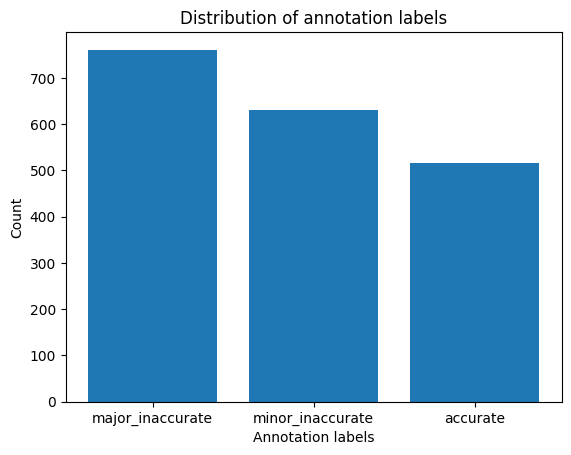

In [5]:
annotations = []

annotations.extend([sample['annotation'] for sample in ds['evaluation']])
annotations = [label for sample in annotations for label in sample]
label_counts = Counter(annotations)
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.bar(labels, counts)
plt.xlabel("Annotation labels")
plt.ylabel("Count")
plt.title("Distribution of annotation labels")
plt.show()